In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

# Drop any missing values in 'pm2.5'
df['pm2.5'] = df['pm2.5'].dropna()

# Compute basic statistics
min_pm25 = df['pm2.5'].min()
max_pm25 = df['pm2.5'].max()
range_pm25 = max_pm25 - min_pm25
mean_pm25 = df['pm2.5'].mean()
median_pm25 = df['pm2.5'].median()
variance_pm25 = df['pm2.5'].var()
std_pm25 = df['pm2.5'].std()

print("Min PM2.5:", min_pm25)
print("Max PM2.5:", max_pm25)
print("Range of PM2.5:", range_pm25)
print("Mean PM2.5:", mean_pm25)
print("Median PM2.5:", median_pm25)
print("Variance of PM2.5:", variance_pm25)
print("Standard Deviation of PM2.5:", std_pm25)

# Optionally, you can also print a full statistical summary:
print("\nStatistical Summary:")
print(df['pm2.5'].describe())



Min PM2.5: 0.0
Max PM2.5: 994.0
Range of PM2.5: 994.0
Mean PM2.5: 98.61321455085375
Median PM2.5: 72.0
Variance of PM2.5: 8473.273781689119
Standard Deviation of PM2.5: 92.05038718924065

Statistical Summary:
count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64


In [15]:
import pickle

# Load the variables from the file
with open('results_lstm.pkl', 'rb') as f:
    results_lstm = pickle.load(f)
    
with open('results_ltc.pkl', 'rb') as f:
    results_ltc = pickle.load(f)
    
    

# Now access your variables
ltc_y_actual = results_ltc['ltc_y_actual']
ltc_y_pred = results_ltc['ltc_y_pred']
ltc_train_losses = results_ltc['ltc_train_losses']
ltc_val_losses = results_ltc['ltc_val_losses']

lstm_y_actual = results_lstm['lstm_y_actual']
lstm_y_pred = results_lstm['lstm_y_pred']
lstm_train_losses = results_lstm['lstm_train_losses']
lstm_val_losses = results_lstm['lstm_val_losses']


LTC Metrics:
{'MSE': 675.550048828125, 'MAE': 14.316624641418457, 'R²': 0.9289183616638184}

LSTM Metrics:
{'MSE': 584.205322265625, 'MAE': 12.999438285827637, 'R²': 0.9385296702384949}

Metric Comparison:
            LTC        LSTM
MSE  675.550049  584.205322
MAE   14.316625   12.999438
R²     0.928918    0.938530


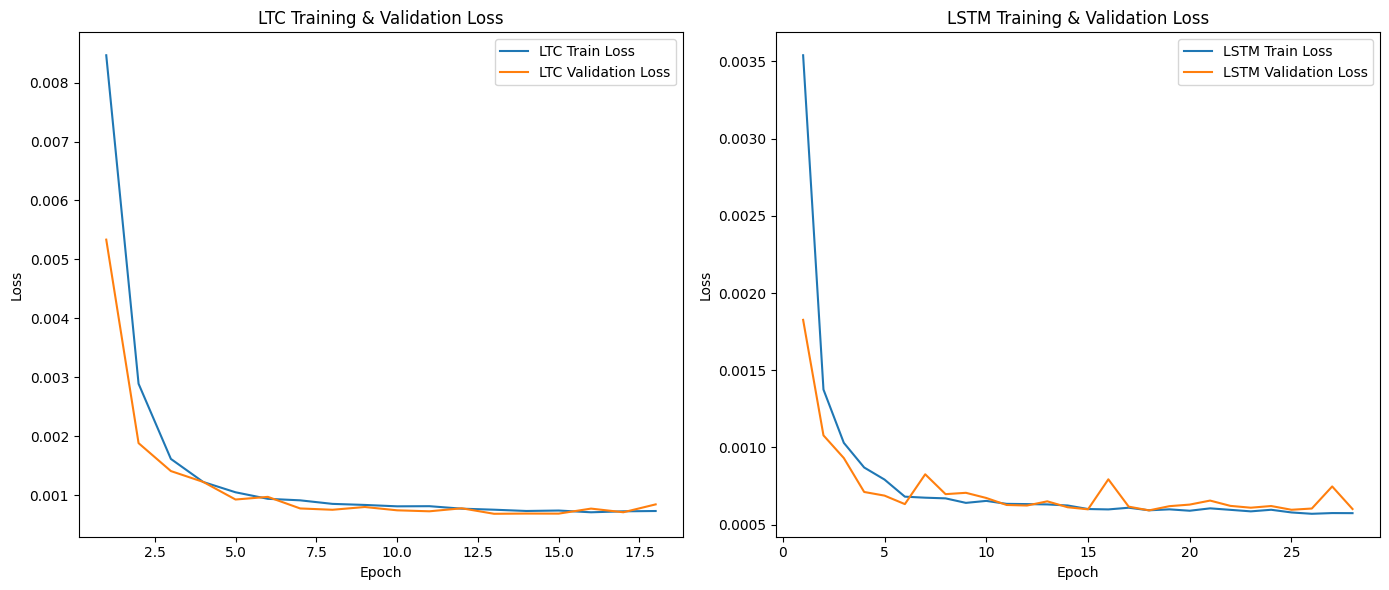

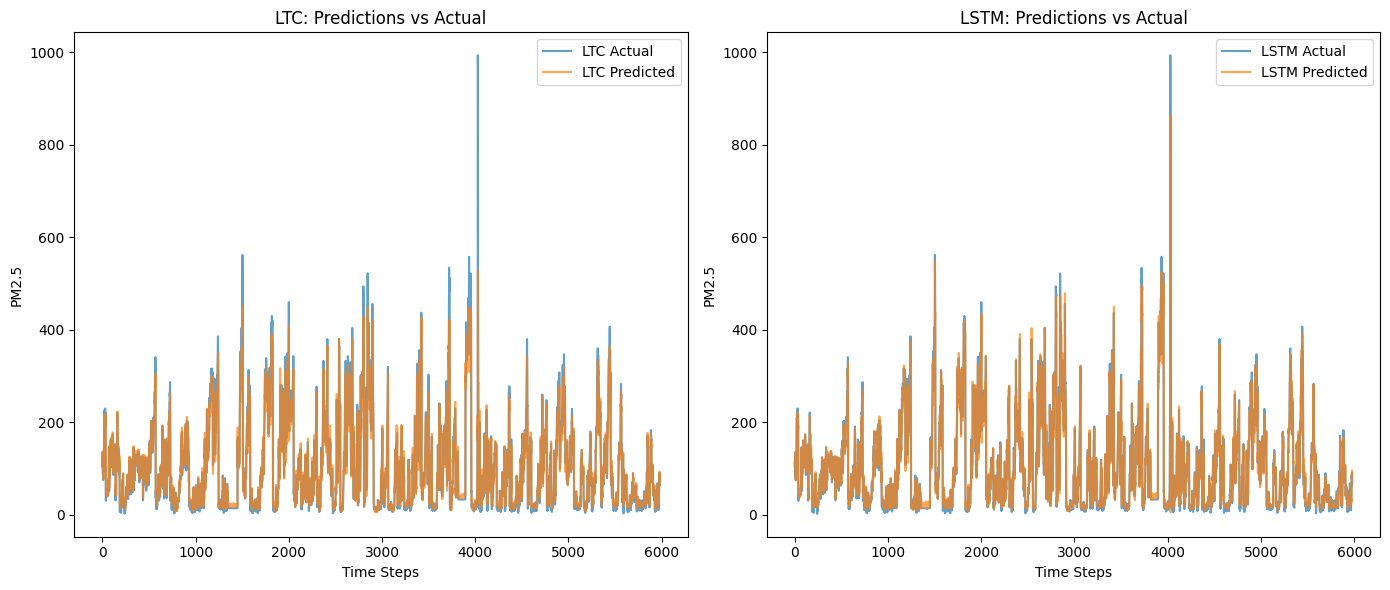

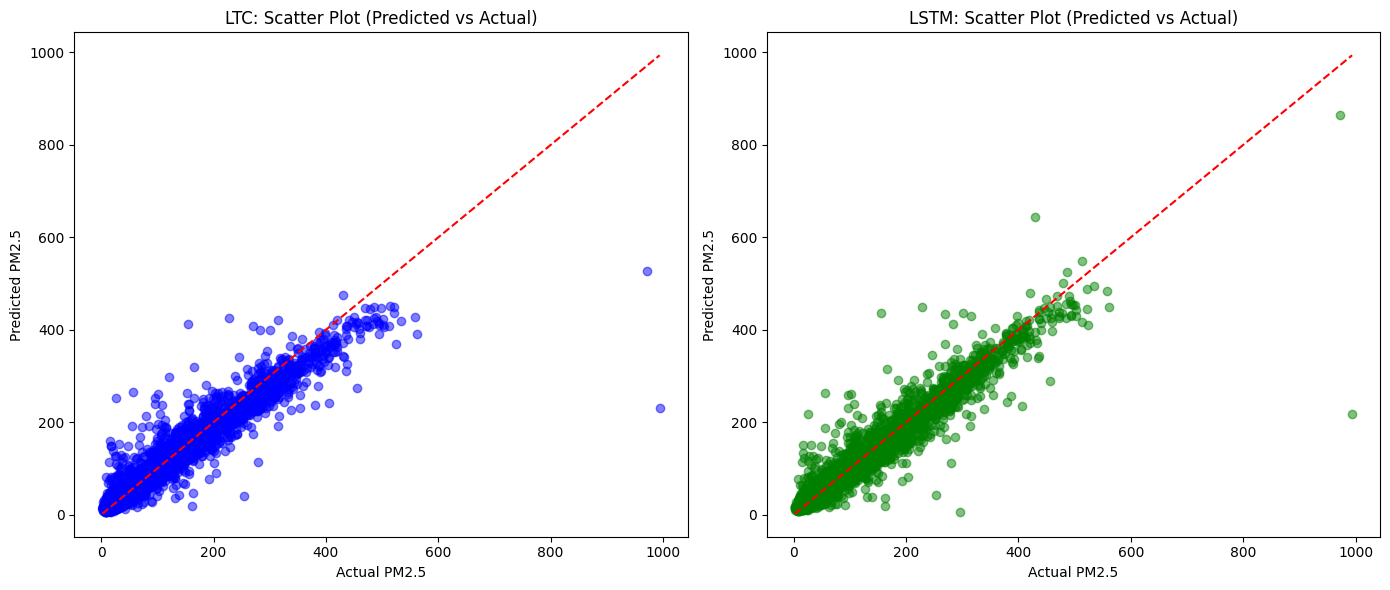

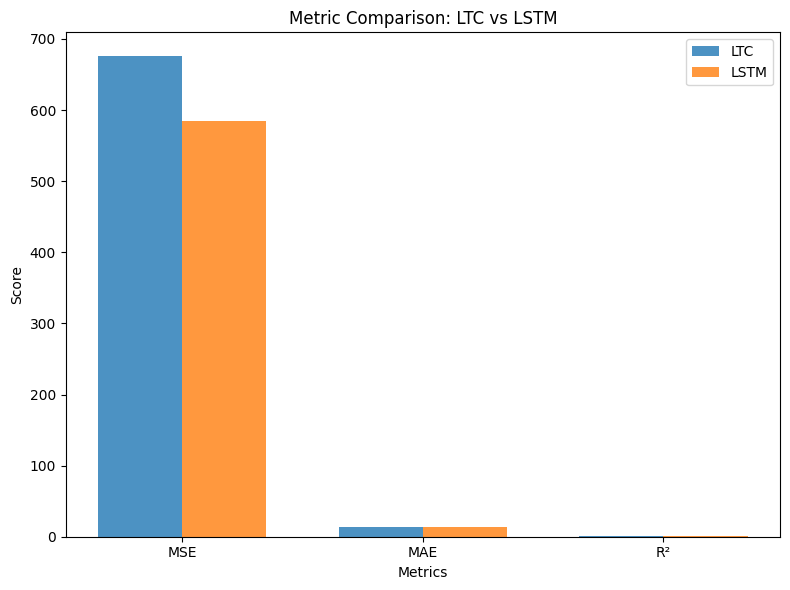

In [16]:
ltc_metrics = {
    'MSE': mean_squared_error(ltc_y_actual, ltc_y_pred),
    'MAE': mean_absolute_error(ltc_y_actual, ltc_y_pred),
    'R²': r2_score(ltc_y_actual, ltc_y_pred)
}

# Compute regression metrics for LSTM
lstm_metrics = {
    'MSE': mean_squared_error(lstm_y_actual, lstm_y_pred),
    'MAE': mean_absolute_error(lstm_y_actual, lstm_y_pred),
    'R²': r2_score(lstm_y_actual, lstm_y_pred)
}

print("LTC Metrics:")
print(ltc_metrics)
print("\nLSTM Metrics:")
print(lstm_metrics)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'LTC': ltc_metrics,
    'LSTM': lstm_metrics
})
print("\nMetric Comparison:")
print(comparison_df)

# --------------------------------------------------------------------------
# Plot training and validation losses for both models
plt.figure(figsize=(14, 6))

# Subplot for LTC Losses
plt.subplot(1, 2, 1)
plt.plot(range(1, len(ltc_train_losses)+1), ltc_train_losses, label='LTC Train Loss')
plt.plot(range(1, len(ltc_val_losses)+1), ltc_val_losses, label='LTC Validation Loss')
plt.title('LTC Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Subplot for LSTM Losses
plt.subplot(1, 2, 2)
plt.plot(range(1, len(lstm_train_losses)+1), lstm_train_losses, label='LSTM Train Loss')
plt.plot(range(1, len(lstm_val_losses)+1), lstm_val_losses, label='LSTM Validation Loss')
plt.title('LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------
# Plot Predictions vs. Actual for both models side-by-side
plt.figure(figsize=(14, 6))

# LTC Predictions vs Actual
plt.subplot(1, 2, 1)
plt.plot(ltc_y_actual, label='LTC Actual', alpha=0.7)
plt.plot(ltc_y_pred, label='LTC Predicted', alpha=0.7)
plt.title('LTC: Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.legend()

# LSTM Predictions vs Actual
plt.subplot(1, 2, 2)
plt.plot(lstm_y_actual, label='LSTM Actual', alpha=0.7)
plt.plot(lstm_y_pred, label='LSTM Predicted', alpha=0.7)
plt.title('LSTM: Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('PM2.5')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------
# Create scatter plots for both models
plt.figure(figsize=(14, 6))

# LTC Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(ltc_y_actual, ltc_y_pred, alpha=0.5, color='blue')
plt.plot([min(ltc_y_actual), max(ltc_y_actual)], [min(ltc_y_actual), max(ltc_y_actual)], 'r--')
plt.title('LTC: Scatter Plot (Predicted vs Actual)')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')

# LSTM Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(lstm_y_actual, lstm_y_pred, alpha=0.5, color='green')
plt.plot([min(lstm_y_actual), max(lstm_y_actual)], [min(lstm_y_actual), max(lstm_y_actual)], 'r--')
plt.title('LSTM: Scatter Plot (Predicted vs Actual)')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------
# Optional: Bar chart for metric comparison
fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(ltc_metrics))
bar_width = 0.35

rects1 = ax.bar(index, list(ltc_metrics.values()), bar_width,
                alpha=0.8, label='LTC')
rects2 = ax.bar(index + bar_width, list(lstm_metrics.values()), bar_width,
                alpha=0.8, label='LSTM')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Metric Comparison: LTC vs LSTM')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(list(ltc_metrics.keys()))
ax.legend()

plt.tight_layout()
plt.show()